In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('DailyDelhiClimate.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
## We will use only date and mean temp

df = df.iloc[:,:2]
df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


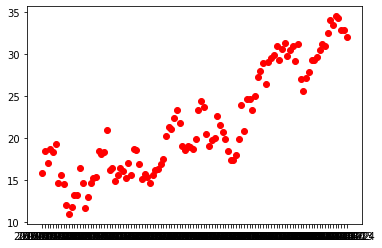

In [8]:
## Visualizing the data

plt.scatter(df.date, df.meantemp, color = 'red')

In [9]:
## TO calcuate the EWMA, there is a function in pandas with the name of dataframe.ewm(alpha)
## where alpha = 1- beta , so if we choose beta = 0.9 (insductry standard) , alpha = 0.1

df['EWMA'] = df.meantemp.ewm(alpha=0.1).mean()

In [10]:
df

,date,meantemp,EWMA
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,17.274600
2,2017-01-03,17.111111,17.214272
3,2017-01-04,18.700000,17.646295
4,2017-01-05,18.388889,17.827632
...,...,...,...
109,2017-04-20,34.500000,30.640166
110,2017-04-21,34.250000,31.001152
111,2017-04-22,32.900000,31.191039
112,2017-04-23,32.875000,31.359436


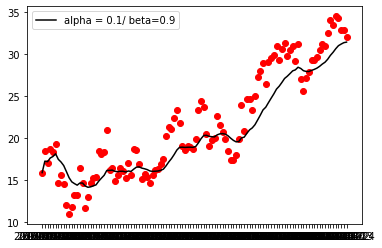

In [12]:
## Plot EWMA

plt.scatter(df.date, df.meantemp, color = 'red')
plt.plot(df.EWMA, color = 'black',label = 'alpha = 0.1/ beta=0.9')
plt.legend()
plt.show()

In [13]:
## So the EWMA is able to capure the trend of data smoothly. 